In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [28]:
def rmsle(y_true, y_pred):
    return 1 - np.sqrt(np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean())

In [29]:
train = pd.read_csv('train_preprocessed_2.csv')
test = pd.read_csv('test_preprocessed_2.csv')

In [30]:
train

,Publication_Hardcover,Publication_Paperback,Publication_other,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Age_of_book
0,0,1,0,1,4,431,4.0,8,1,1183,1036,220.00,6
1,0,1,0,2,2,446,3.9,14,2,92,732,202.93,10
2,0,1,0,3,3,366,4.8,6,3,25,670,299.00,40
3,0,1,0,1,87,559,4.1,13,1,325,878,180.00,5
4,1,0,0,1,1,117,5.0,1,1,47,638,965.62,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6232,0,1,0,1,1,380,5.0,2,1,22,670,322.00,4
6233,0,1,0,1,4,446,3.3,9,1,325,878,421.00,6
6234,0,1,0,1,3,435,3.8,3,1,517,702,399.00,16
6235,0,1,0,1,2,478,3.5,4,1,1183,1036,319.00,7


In [31]:
X =train.drop(columns=['Price'], axis=1)

In [32]:
y = train['Price']

In [33]:
train_X, test_X, train_y , test_y = train_test_split(X,y,test_size=0.2, random_state=24)

In [34]:
def run_model_evaluate(model,train_X, train_y,test_X, test_y, X,y,test,filename):
    model.fit(train_X, train_y)
    train_pred = model.predict(train_X)
    test_pred = model.predict(test_X)
    print('train_rmsle:' , rmsle(train_pred,train_y))
    print('test_rmsle:' ,rmsle(test_pred,test_y))
    model.fit(X,y)
    pred = model.predict(test)
    res = pd.DataFrame(pred, columns=['Price'])
    res.to_csv(filename, index  = False)

In [35]:
linear_reg =LinearRegression()
run_model_evaluate(linear_reg,train_X, train_y,test_X, test_y, X,y,test,'Linear.csv')

train_rmsle: 0.6542252213292667
test_rmsle: 0.6560856327535389


C:\Users\MUTHUK~1\AppData\Local\Temp/ipykernel_8804/986885743.py:2: RuntimeWarning: invalid value encountered in log10
  return 1 - np.sqrt(np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean())


In [36]:
decision_tree = DecisionTreeRegressor()
run_model_evaluate(decision_tree,train_X, train_y,test_X, test_y, X,y,test,'decision_tree.csv')

train_rmsle: 0.9789054216866465
test_rmsle: 0.6396694883725578


In [37]:
random_forest = RandomForestRegressor()
run_model_evaluate(random_forest,train_X, train_y,test_X, test_y, X,y,test,'random_forest.csv')

train_rmsle: 0.8524960924948741
test_rmsle: 0.7114831745848451


In [38]:
Knn = KNeighborsRegressor()
run_model_evaluate(Knn,train_X, train_y,test_X, test_y, X,y,test,'Knn.csv')

train_rmsle: 0.738435344710382
test_rmsle: 0.6827272961737973


In [41]:
from tqdm import tqdm
res_rmsle= []
for i in tqdm(range(1,50)):
    Knn = KNeighborsRegressor(n_neighbors=i)
    model.fit(train_X, train_y)
    y_pred = model.predict(test_X)
    x_test_rmsle = rmsle(y_pred ,test_y)
    res_rmsle.append(x_test_rmsle)

  0%|                                                                                           | 0/49 [00:00<?, ?it/s]C:\Users\MUTHUK~1\AppData\Local\Temp/ipykernel_8804/986885743.py:2: RuntimeWarning: invalid value encountered in log10
  return 1 - np.sqrt(np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean())
C:\Users\MUTHUK~1\AppData\Local\Temp/ipykernel_8804/986885743.py:2: RuntimeWarning: invalid value encountered in log10
  return 1 - np.sqrt(np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean())
C:\Users\MUTHUK~1\AppData\Local\Temp/ipykernel_8804/986885743.py:2: RuntimeWarning: invalid value encountered in log10
  return 1 - np.sqrt(np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean())
C:\Users\MUTHUK~1\AppData\Local\Temp/ipykernel_8804/986885743.py:2: RuntimeWarning: invalid value encountered in log10
  return 1 - np.sqrt(np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean())
C:\Users\MUTHUK~1\AppData\Local\Temp/ipykernel_8804/986885743.py:2: RuntimeWa

C:\Users\MUTHUK~1\AppData\Local\Temp/ipykernel_8804/986885743.py:2: RuntimeWarning: invalid value encountered in log10
  return 1 - np.sqrt(np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean())
C:\Users\MUTHUK~1\AppData\Local\Temp/ipykernel_8804/986885743.py:2: RuntimeWarning: invalid value encountered in log10
  return 1 - np.sqrt(np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean())
C:\Users\MUTHUK~1\AppData\Local\Temp/ipykernel_8804/986885743.py:2: RuntimeWarning: invalid value encountered in log10
  return 1 - np.sqrt(np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean())
C:\Users\MUTHUK~1\AppData\Local\Temp/ipykernel_8804/986885743.py:2: RuntimeWarning: invalid value encountered in log10
  return 1 - np.sqrt(np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean())
C:\Users\MUTHUK~1\AppData\Local\Temp/ipykernel_8804/986885743.py:2: RuntimeWarning: invalid value encountered in log10
  return 1 - np.sqrt(np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mea

In [45]:
import matplotlib.pyplot as plt

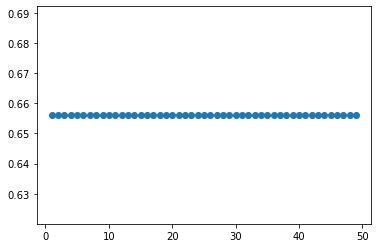

In [47]:
plt.scatter(range(1,50),res_rmsle)